In [1]:
import uproot4
from matplotlib import pyplot as p
from hist import Hist
import hist
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# Pretty printing arrays
from pprint import pprint


To get `data_18x275.root` download it from S3 
[here](https://dtn01.sdcc.bnl.gov:9001/buckets/eictest/browse/QVRIRU5BL0ZVTEwvY2FueW9ubGFuZHMtdjEuMi9ESVMvTkMvMTh4Mjc1L21pblEyPTEwL3B5dGhpYThOQ0RJU18xOHgyNzVfbWluUTI9MTBfYmVhbUVmZmVjdHNfeEFuZ2xlPS0wLjAyNV9oaURpdl92dHhmaXhfMS4wMDU0LnJvb3Q=)
and rename to data_18x275.root

In [2]:
file=uproot4.open("data/test_gun.edm4hep.root")

# To see all object names in the file:
# file.items()

# only names: file.keys(), file.values()))

# To see items in subdirectories
file.keys(recursive=True)

# There are more functions related to file:
# https://uproot.readthedocs.io/en/latest/uproot.reading.ReadOnlyFile.html

# Root directories:
# https://uproot.readthedocs.io/en/latest/uproot.reading.ReadOnlyDirectory.html

# To read multiple files at once (aka TChain)
# https://uproot.readthedocs.io/en/latest/basic.html#iterating-over-many-files

['events;1',
 'metadata;1',
 'run_metadata;1',
 'evt_metadata;1',
 'col_metadata;1']

In [3]:
# File has a data tree called 'events'
# get events tree as a separate thing
tree = file["events"]

# Print number of entries
print(f"Number of entries: {tree.num_entries}")

# Uncomment this to see all values:
#tree.show()

names = [key for key in tree.keys() if "EcalEndcapNHits" in key]
names

# More TBranch functions:
#https://uproot.readthedocs.io/en/latest/uproot.behaviors.TBranch.TBranch.html

Number of entries: 2


['EcalEndcapNHits',
 'EcalEndcapNHits/EcalEndcapNHits.cellID',
 'EcalEndcapNHits/EcalEndcapNHits.energy',
 'EcalEndcapNHits/EcalEndcapNHits.position.x',
 'EcalEndcapNHits/EcalEndcapNHits.position.y',
 'EcalEndcapNHits/EcalEndcapNHits.position.z',
 'EcalEndcapNHits/EcalEndcapNHits.contributions_begin',
 'EcalEndcapNHits/EcalEndcapNHits.contributions_end',
 'EcalEndcapNHits#0',
 'EcalEndcapNHits#0/EcalEndcapNHits#0.index',
 'EcalEndcapNHits#0/EcalEndcapNHits#0.collectionID',
 'EcalEndcapNHitsContributions',
 'EcalEndcapNHitsContributions/EcalEndcapNHitsContributions.PDG',
 'EcalEndcapNHitsContributions/EcalEndcapNHitsContributions.energy',
 'EcalEndcapNHitsContributions/EcalEndcapNHitsContributions.time',
 'EcalEndcapNHitsContributions/EcalEndcapNHitsContributions.stepPosition.x',
 'EcalEndcapNHitsContributions/EcalEndcapNHitsContributions.stepPosition.y',
 'EcalEndcapNHitsContributions/EcalEndcapNHitsContributions.stepPosition.z',
 'EcalEndcapNHitsContributions#0',
 'EcalEndcapNHitsCont

In [4]:
names = [key for key in tree.keys() if "MCParticles" in key]
names

['MCParticles',
 'MCParticles/MCParticles.PDG',
 'MCParticles/MCParticles.generatorStatus',
 'MCParticles/MCParticles.simulatorStatus',
 'MCParticles/MCParticles.charge',
 'MCParticles/MCParticles.time',
 'MCParticles/MCParticles.mass',
 'MCParticles/MCParticles.vertex.x',
 'MCParticles/MCParticles.vertex.y',
 'MCParticles/MCParticles.vertex.z',
 'MCParticles/MCParticles.endpoint.x',
 'MCParticles/MCParticles.endpoint.y',
 'MCParticles/MCParticles.endpoint.z',
 'MCParticles/MCParticles.momentum.x',
 'MCParticles/MCParticles.momentum.y',
 'MCParticles/MCParticles.momentum.z',
 'MCParticles/MCParticles.momentumAtEndpoint.x',
 'MCParticles/MCParticles.momentumAtEndpoint.y',
 'MCParticles/MCParticles.momentumAtEndpoint.z',
 'MCParticles/MCParticles.spin.x',
 'MCParticles/MCParticles.spin.y',
 'MCParticles/MCParticles.spin.z',
 'MCParticles/MCParticles.colorFlow.a',
 'MCParticles/MCParticles.colorFlow.b',
 'MCParticles/MCParticles.parents_begin',
 'MCParticles/MCParticles.parents_end',
 'MC

In [8]:
tree.keys(filter_name="*EcalEndcapN*")

['EcalEndcapNHits',
 'EcalEndcapNHits/EcalEndcapNHits.cellID',
 'EcalEndcapNHits/EcalEndcapNHits.energy',
 'EcalEndcapNHits/EcalEndcapNHits.position.x',
 'EcalEndcapNHits/EcalEndcapNHits.position.y',
 'EcalEndcapNHits/EcalEndcapNHits.position.z',
 'EcalEndcapNHits/EcalEndcapNHits.contributions_begin',
 'EcalEndcapNHits/EcalEndcapNHits.contributions_end',
 'EcalEndcapNHits#0',
 'EcalEndcapNHits#0/EcalEndcapNHits#0.index',
 'EcalEndcapNHits#0/EcalEndcapNHits#0.collectionID',
 'EcalEndcapNHitsContributions',
 'EcalEndcapNHitsContributions/EcalEndcapNHitsContributions.PDG',
 'EcalEndcapNHitsContributions/EcalEndcapNHitsContributions.energy',
 'EcalEndcapNHitsContributions/EcalEndcapNHitsContributions.time',
 'EcalEndcapNHitsContributions/EcalEndcapNHitsContributions.stepPosition.x',
 'EcalEndcapNHitsContributions/EcalEndcapNHitsContributions.stepPosition.y',
 'EcalEndcapNHitsContributions/EcalEndcapNHitsContributions.stepPosition.z',
 'EcalEndcapNHitsContributions#0',
 'EcalEndcapNHitsCont

In [5]:
for hit in tree['MCParticles/MCParticles.generatorStatus'].array():
    print(hit)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [23]:
events = tree.arrays([
    'EcalEndcapNHits/EcalEndcapNHits.cellID',
    'EcalEndcapNHits/EcalEndcapNHits.position.x',
    'EcalEndcapNHits/EcalEndcapNHits.position.y',
    'EcalEndcapNHits/EcalEndcapNHits.position.z',
    'EcalEndcapNHits/EcalEndcapNHits.contributions_begin',
    'EcalEndcapNHits/EcalEndcapNHits.contributions_end',
    'EcalEndcapNHitsContributions/EcalEndcapNHitsContributions.PDG',
    'EcalEndcapNHitsContributions/EcalEndcapNHitsContributions.energy',
    'EcalEndcapNHitsContributions/EcalEndcapNHitsContributions.time'
])

In [27]:
for event in events:
    print("----------------")
    print(len(event['EcalEndcapNHits/EcalEndcapNHits.contributions_begin']))
    print(len(event['EcalEndcapNHitsContributions/EcalEndcapNHitsContributions.PDG']))
    print(event['EcalEndcapNHits/EcalEndcapNHits.contributions_begin'])
    print(event['EcalEndcapNHits/EcalEndcapNHits.contributions_end'])
    print(event['EcalEndcapNHits/EcalEndcapNHits.position.x'])
    #for part in event:
    #        print(part[])
print("----------------")

----------------
315
223166
[0, 140309, 152347, 156365, 156728, ... 223137, 223139, 223146, 223148, 223153]
[140309, 152347, 156365, 156728, 156784, ... 223139, 223146, 223148, 223153, 223166]
[205, 226, 226, 246, 287, 246, 266, 205, ... 144, 246, 328, 328, 308, 82, 82, 226]
----------------
322
220759
[0, 135884, 153150, 164429, 172529, ... 220730, 220731, 220747, 220755, 220757]
[135884, 153150, 164429, 172529, 176233, ... 220731, 220747, 220755, 220757, 220759]
[205, 226, 205, 205, 184, 226, 164, 184, ... 123, 102, 82, 348, 205, -61.5, 61.5]
----------------


In [6]:
points_z = tree['DIRCBarHits/DIRCBarHits.position.z'].array()
points_ed = tree['DIRCBarHits/DIRCBarHits.energyDeposit'].array()

# To load them in one array
# points_z = tree['DIRCBarHits/DIRCBarHits.momentum.z'].array(library="pd")
points_z = ak.flatten(points_z)
points_ed = ak.flatten(points_ed)
points_z

KeyInFileError: not found: 'DIRCBarHits/DIRCBarHits.energyDeposit'

    Available keys: 'DIRCBarHits/DIRCBarHits.EDep', 'DIRCBarHits/DIRCBarHits.position.x', 'DIRCBarHits/DIRCBarHits.position.y', 'DIRCBarHits/DIRCBarHits.position.z', 'DIRCBarHits/DIRCBarHits.cellID', 'DIRCBarHits/DIRCBarHits.time'...

in file data/test_gun.edm4hep.root
in object /events;1

In [ ]:
points_z

for i in range(10):
    print(points_z[i])

-63.09327718527777
-576.0299179313872
-153.77360771735533
-237.00420346091641
-242.615427334
1522.4330675849628
1522.9276175806563
1623.3410422996396
1624.9148358441144
1623.1332693298798


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9f7b1b81c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

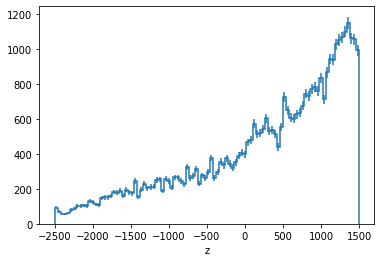

In [ ]:
import hist
from hist import Hist
hist = Hist(hist.axis.Regular(bins=100, start=-2500, stop=1500, name="z"))
# hist = Hist(Hist.axes.Regular(100, -5, 5, name="x"))
hist.fill(points_z)
hist.plot()
#     ,
#     hist.axis.Regular(10, 0, 1, name="y"),
#     hist.axis.Regular(10, 0, 1, name="z"),
# )

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f9f72f63cd0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f9f72f72130>, text=[])

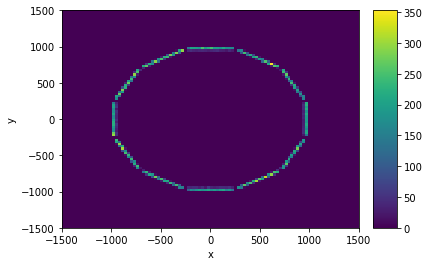

In [ ]:
import hist
from hist import Hist

# Get data
points_x = tree['DIRCBarHits/DIRCBarHits.position.x'].array()
points_y = tree['DIRCBarHits/DIRCBarHits.position.y'].array()

# Flatten it!
points_x = ak.flatten(points_x)
points_y = ak.flatten(points_y)


# Build the histogram
hist = Hist(
    hist.axis.Regular(bins=100, start=-1500, stop=1500, name="x"),
    hist.axis.Regular(bins=100, start=-1500, stop=1500, name="y"),)

hist.fill(points_x, points_y)
hist.plot2d()
# hist = Hist(
#     hist.axis.Regular(10, 0, 1, name="x"),
#     hist.axis.Regular(10, 0, 1, name="y"),
#     hist.axis.Regular(10, 0, 1, name="z"),
# )

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({"x": points_x, 'y': points_y, 'z': points_z, 'ed': points_ed})

fig = px.scatter_3d(df, x='x', y='y', z='z', color='ed')
fig.show()